# <Center> Homework 5: Classification </center>

This assignment needs the following two data files:
- train.csv: dataset for training
- test.csv: dataset for testing. 
    
Both of them have samples in the following format. The `text` column contains documents and the `label` column gives the sentiment of each document.

|label | text |
|------|------|
|1|  I must admit that I'm addicted to "Version 2.0...|
|0|  I think it's such a shame that an enormous tal...|
|1|  The Sunsout No Room at The Inn Puzzle has oddl...|
|...|...|


## Q1 Classification

- Define a function `create_model(train_docs, train_y, test_docs, test_y, model_type='svm', stop_words='english', min_df = 1, print_result = True, algorithm_para=1.0`), where

    - `train_docs`: is a list of documents for training
    - `train_y`: is the ground-truth labels of training documents
    - `test_docs`: is a list of documents for test
    - `test_y`: is the ground-truth labels of test documents
    - `model_type`: two options: `nb` (Multinomial Naive Bayes) or `svm` (Linear SVM)
    - `stop_words`: indicate whether stop words should be removed. The default value is 'english', i.e. remove English stopwords.
    - `min_df`: only word with document frequency above this threshold can be included. The default is 1. 
    - `print_result`: controls whether to show classification report or plots. The default is True.
    - `algorithm_para`: the hyperparameter of algorithms, refers to C in SVM and alpha in NB. Both C and alpha have default values of 1.0. Please check sklearn documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


- This function does the following:
    - Fit a `TfidfVectorizer` using `train_docs` with options `stop_words, min_df` as specified in the function inputs. Extract features from `train_docs` using the fitted `TfidfVectorizer`.
    - Build `linear SVM` or `Multinomial Naive Bayes` model as specified by `model_type` with `algorithm_para` setting. Train the model using the extracted features and `train_y`. 
    - Transform `test_docs` by the fitted `TfidfVectorizer` (hint: use function `transform` not `fit_transform`).
    - Predict the labels for `test_docs`. If `print_result` is True, print the classification report.
    - Calculate the AUC score and PRC score (or Average Precision) for class 1 on the test dataset. If `print_result` is True, plot the ROC and PRC curves. **Hint**: 
        - `sklearn.svm.LinearSVM` does not provide `predict_proba` function. 
        - Instead, you can use its `decision_function` (see <a href = "https://stackoverflow.com/questions/59227176/how-to-plot-roc-and-calculate-auc-for-binary-classifier-with-no-probabilities-s">some referenc code</a>) 
        - Another option is to use `sklearn.svm.SVC` with `kernel='linear' and probability=False` (see <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html"> reference</a>)
    - Return the AUC and PRC scores.

    
- Test your function with following cases:
    - model_type='svm', stop_words = 'english', min_df = 1
    - model_type='nb', stop_words = 'english', min_df = 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np


train = pd.read_csv("/content/drive/MyDrive/Fall_2021/BIA_660_Web_Mining/assignments/Homework5/train5.csv")
test = pd.read_csv("/content/drive/MyDrive/Fall_2021/BIA_660_Web_Mining/assignments/Homework5/test5.csv")


In [4]:
tfidf_vect = TfidfVectorizer() 
dtm_train = tfidf_vect.fit_transform(train["text"])
# dtm_test = tfidf_vect.transform(train["label"]) 
# X_train, X_test, y_train, y_test = dtm_train, dtm_test, train_y, test_y

# create_model(train["text"], train["label"], test["text"], test["label"], \
#           model_type='svm', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

In [9]:
dtm_train

<12000x33913 sparse matrix of type '<class 'numpy.float64'>'
	with 638640 stored elements in Compressed Sparse Row format>

In [ ]:
# Define the function for Task 1

def create_model(train_docs, train_y, test_docs, test_y, \
              model_type, stop_words=None, min_df = 1, print_result = True, algorithm_para=1.0):
    
    tfidf_vect = TfidfVectorizer(stop_words=stop_words) 
    dtm_train = tfidf_vect.fit_transform(train_docs)
    dtm_test = tfidf_vect.transform(test_docs) 
    X_train, X_test, y_train, y_test = dtm_train, dtm_test, train_y, test_y

    if model_type == 'svm':

        classifier_svm = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=stop_words, min_df=min_df)),
        ('clf', svm.SVC(C=algorithm_para,kernel='linear',probability=True))])

        classifier_svm.fit(train_docs,train_y)
        predicted_svm = classifier_svm.predict(test_docs)

        predict_svm=classifier_svm.predict_proba(test_docs)
        fpr, tpr, thresholds = roc_curve(y_test, predict_svm[:,1], pos_label=1) 
        precision, recall, thresholds = precision_recall_curve(y_test, predict_svm[:,1], pos_label=1)

        auc_score = auc(fpr, tpr)
        prc_score = auc(recall, precision)

        if print_result:
            print(classification_report(y_test, predicted_svm))
            print("AUC: {:.2%}".format(auc_score), "PRC: {:.2%}".format(prc_score))

            plt.figure();
            plt.plot(fpr, tpr, color='darkorange', lw=2);
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
            plt.xlim([0.0, 1.0]);
            plt.ylim([0.0, 1.05]);
            plt.xlabel('False Positive Rate');
            plt.ylabel('True Positive Rate');
            plt.title('svm-AUC');
            plt.show();

            plt.figure();
            plt.plot(recall, precision, color='darkorange', lw=2);
            plt.xlim([0.0, 1.0]);
            plt.ylim([0.0, 1.05]);
            plt.xlabel('Recall');
            plt.ylabel('Precision');
            plt.title('svm-PRC');
            plt.show(); 

    else:
        clf = MultinomialNB(alpha=algorithm_para).fit(X_train, y_train)
        predicted = clf.predict(X_test)

        predict_p=clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, predict_p[:,1], pos_label=1) 
        precision, recall, thresholds = precision_recall_curve(y_test, predict_p[:,1], pos_label=1)

        auc_score = auc(fpr, tpr)
        prc_score = auc(recall, precision)

        if print_result:
            print(classification_report(y_test, predicted))
            print("AUC: {:.2%}".format(auc_score), "PRC: {:.2%}".format(prc_score))

            plt.figure();
            plt.plot(fpr, tpr, color='darkorange', lw=2);
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
            plt.xlim([0.0, 1.0]);
            plt.ylim([0.0, 1.05]);
            plt.xlabel('False Positive Rate');
            plt.ylabel('True Positive Rate');
            plt.title('nb-AUC');
            plt.show();

            plt.figure();
            plt.plot(recall, precision, color='darkorange', lw=2);
            plt.xlim([0.0, 1.0]);
            plt.ylim([0.0, 1.05]);
            plt.xlabel('Recall');
            plt.ylabel('Precision');
            plt.title('nb-PRC');
            plt.show(); 

    return auc_score, prc_score


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       509
           1       0.83      0.85      0.84       491

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

AUC: 91.87% PRC: 91.94%


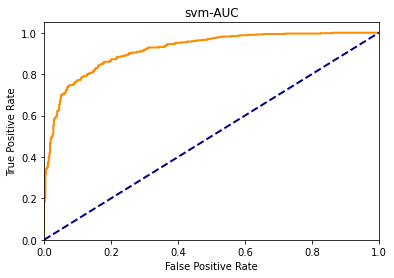

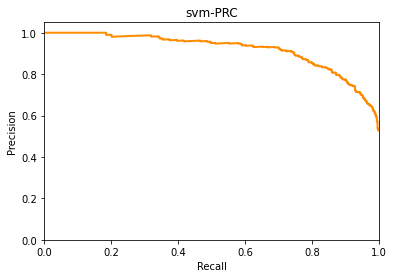

In [ ]:
# Test the function with 'svm'

auc_score, prc_socre = create_model(train["text"], train["label"], test["text"], test["label"], \
          model_type='svm', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

# comment : for building SVM model I have used sklearn's svm.SVM() function among the suggested functions. 

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       509
           1       0.78      0.83      0.80       491

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000

AUC: 88.87% PRC: 89.49%


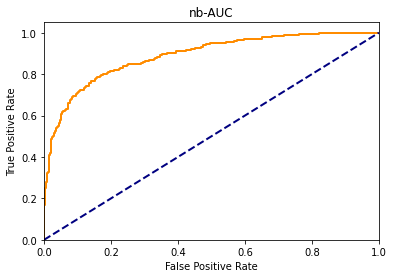

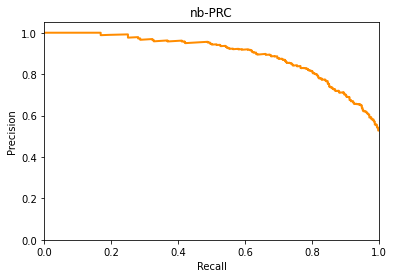

In [ ]:
# Test the function with 'nb' 

auc_score, prc_score = create_model(train["text"], train["label"], test["text"], test["label"], \
                    model_type='nb', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

### Task 2: Search for best parameters 

From Task 1, you may find there are many possible ways to configure parameters. Next, let's use grid search to find the optimal parameters

- Define a function `search_para(docs, y)` where `docs` are training documents and `y` is the ground-truth labels.
- This function does the following:
    - Create a pipleline which integrates `TfidfVectorizer` and `SVM` classifier 
    - Define the parameter ranges as follow:
        - `stop_words': [None, 'english']`
        - `min_df: [1,2,5]`
        - `C: [0.2,0.5,0.8]`
    - Set the scoring metric to "f1_macro"
    - Use `GridSearchCV` with `5-fold cross validation` to find the best parameter values based on the training dataset. 
    - Print the best parameter values
    
- Call the function `svm_model` defined in Task 1 `with the best parameter values`. You will have to add the best C value to the original function, because you used default settings of the SVM classifier previously. Then please briefly answer the following:
    - Compare with the model in Task 1, how is the performance improved on the test dataset?
    - Why do you think the new parameter values help sentiment classification?

In [ ]:
# Define grade search function

def search_para(docs, y):
    text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                         ('clf',svm.SVC(kernel='linear',probability=True))])
    
    parameters = {'tfidf__min_df': [1,2,5,10]
              'tfidf__stop_words': [None,"english"],
              'clf__C': [0.2, 0.5, 1.0], 
              }

    metric =  "f1_macro"
    
    gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=5)

    gs_clf = gs_clf.fit(docs, y)
    for param_name in gs_clf.best_params_:
        print("{0}:\t{1}".format(param_name, gs_clf.best_params_[param_name]))
    


In [ ]:
search_para(train["text"], train["label"])

clf__C:	0.2
tfidf__min_df:	2
tfidf__stop_words:	None


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       509
           1       0.86      0.84      0.85       491

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

AUC: 92.16% PRC: 92.12%


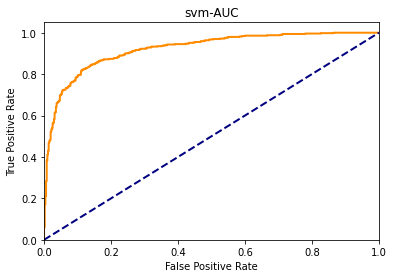

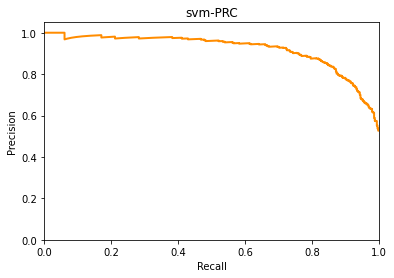

In [ ]:
# call the function with the best parameters

auc_score, prc_score = create_model(train["text"], train["label"], test["text"], test["label"], \
          model_type='svm', stop_words = None, min_df = 2, print_result=True, algorithm_para=0.2)

# Please answer the questions


## Task 3. How many samples are enough? 

This task is to help you understand the impact of sample size on classifier performance. 

- Define a function `sample_size_impact(train_docs, train_y, test_docs, test_y)` with the input as defined above. 
    
    
- This function does the following:
    - Starting with 500 samples, in each round you build a classifier with 500 more samples. i.e. in round 1, you use samples from 0:500, and in round 2, you use samples from 0:1000, …, until you use all samples. 
    - In each round, call the `create_model` function with `model_type='svm'` and then `model_type='nb'`. Keep other parameters as default. Record the AUC score of each model type and the sample size.
    - For each model type, plot a line chart show the relationship between sample size and the AUC score. 
    - This function has no return.
    
    
- Write your analysis on the following:
    - How sample size affects each classifier’s performance? 
    - If it is expensive to collect and label samples, can you decide an optimal sample size with model performance and the cost of samples both considered? 
    - How is performance of SVM classifier compared with Naïve Bayes classifier?

In [ ]:
# Show the impact of sample size
from matplotlib import pyplot as plt

def sample_size_impact(train_docs, train_y, test_docs, test_y): 
    auc_svm = list()
    auc_nb = list()
    sample_size = [i for i in range(500, len(train_docs)+1, 500)]
    for size in sample_size:
        train = train_docs[0:size]
        y = train_y[0:size]
        auc_score_svm, prc_score_svm = create_model(train, y, test_docs, test_y, \
                                            model_type='svm', stop_words = None, min_df = 1, print_result=False, algorithm_para=1.0) 
        
        auc_score_nb, prc_score_nb = create_model(train, y, test_docs, test_y, \
                    model_type='nb', stop_words = None, min_df = 1, print_result=False, algorithm_para=1.0)
        
        auc_svm.append(auc_score_svm)
        auc_nb.append(auc_score_nb)
    
    x  = [i for i in range(500, len(train_docs)+1, 500)]  
    fig, ax = plt.subplots()
    ax.plot(x,auc_svm, color='darkorange')
    ax.plot(x,auc_nb, color='blue')
    plt.xlabel('sample size')
    plt.ylabel('AUC')
    ax.legend(['SVM','NB'])

    plt.show() 


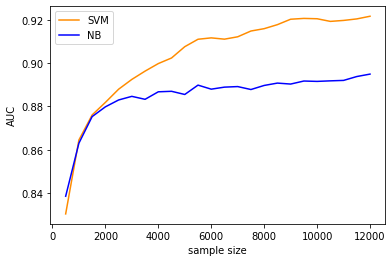

In [ ]:
sample_size_impact(train["text"], train["label"], test["text"], test["label"])

## Briefly answer the questions

#### How sample size affects each classifier’s performance?
- From the plot above it is evident that, SVM and Naive bayes model perform better with more number of smaples 
- higher the number of samples better the performance
- More data ensures higher probability of containing useful information for the model to learn

#### If it is expensive to collect and label samples, can you decide an optimal sample size with model performance and the cost of samples both considered?
- Common way to choose the smple size is using a confidence level, i.e. the larger the required confidence level, the larger the sample size (given a constant precision requirement).
- a way to calculate the scmaple is as follows 
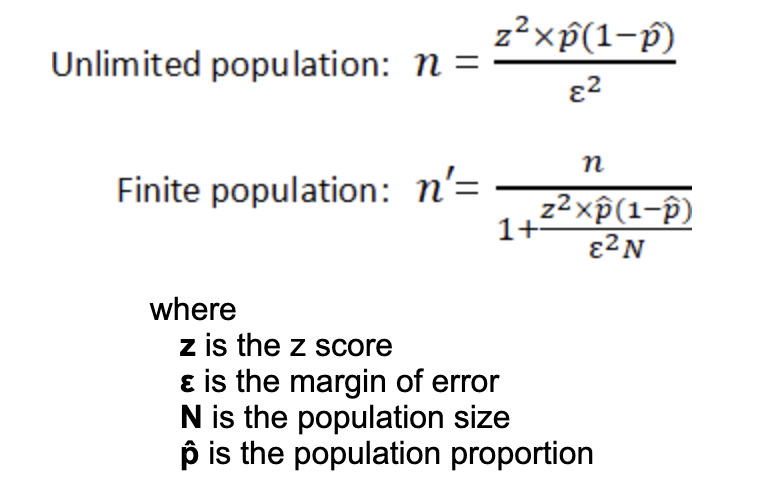
- We can use sample size prediction algorithm or sample size determination (SSD) method that determines sample size 
- we can decide on the number of smaples by making use of learning curve, which is a collection of data points that describes how the performance of a classifier is related to training smaple sizes 
- Progressive sampling and active learning are most popular algorithms used to seclect the number of samples to be used
- the same has been studed and proven in the paper linked here: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-12-8 

####How is performance of SVM classifier compared with Naïve Bayes classifier?
- The classification task can be achieved by bothe Naive bayes and SVM 
- With limited sample sizes nothe SVM and Naive bayes performed almost similar but the SVM performed much better compared to Naive bayes with a larger number of sample 
- SVM model accuracy reached over 90% where as Naive bayes did not perform as better as SVM 

## Task 4 (Bonus): How to improve sentiment classification?

- Can you tune other parameters of TfidfVectorizer or SVM model to further improve the classification performance? Try to beat the model you get in Task 2!

In [ ]:
def create_model2(train_docs, train_y, test_docs, test_y, \
              stop_words='english', min_df = 3, algorithm_para=0.5):
    
    tfidf_vect = TfidfVectorizer()
    tfidf_vect = TfidfVectorizer(stop_words="english") 
    dtm_train = tfidf_vect.fit_transform(train_docs)
    dtm_test = tfidf_vect.transform(test_docs) 
    X_train, X_test, y_train, y_test = dtm_train, dtm_test, train_y, test_y

    classifier_svm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words, min_df=min_df)),
    ('clf', svm.SVC(C=algorithm_para,kernel='linear',probability=True))])

    classifier_svm.fit(train_docs,train_y)
    predicted_svm = classifier_svm.predict(test_docs)

    predict_svm=classifier_svm.predict_proba(test_docs)
    fpr, tpr, thresholds = roc_curve(y_test, predict_svm[:,1], pos_label=1) 
    precision, recall, thresholds = precision_recall_curve(y_test, predict_svm[:,1], pos_label=1)

    print(classification_report(y_test, predicted_svm))
    print("AUC: {:.2%}".format(auc(fpr, tpr)), "PRC: {:.2%}".format(auc(recall, precision)))

In [ ]:
create_model2(train["text"], train["label"], test["text"], test["label"], \
              stop_words="english", min_df = 1, algorithm_para=0.5)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       509
           1       0.83      0.85      0.84       491

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

AUC: 92.25% PRC: 92.13%


Amoong the various combination of parameter I found the following combination of the parameter gave a better performing model\
Model parametes:  stop_words="english",	min_df=1,  algorithms_para=0.5\
performance: AUC=92.25	PRC=2.13																					

I tried the following combination of the parameters and arrived the above conclusion 

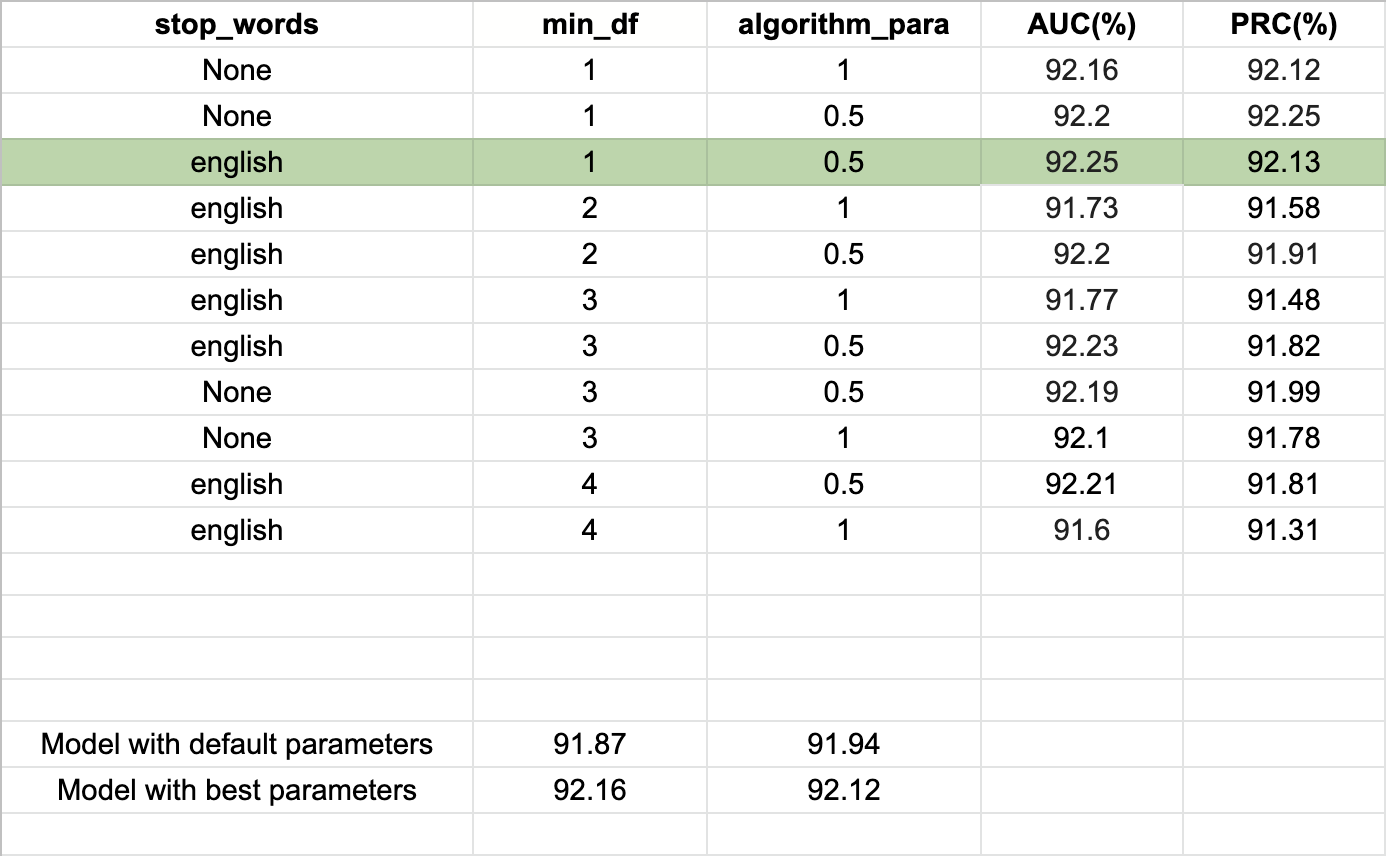